# Scipy-Stats Juptyer Notebook
*****
*****

## Need an image

### Outline of this Notebook:

1. Overview of Scipy Stats Jupyter Notebook
2. Analysis of Variance(Anova)
3. Dataset: Diet
    - Importing Packages for the Notebook
    - Exploring the Dataset
    - Preprocessing the Data
4. Hypothesis and Assumption Testing of Dataset to meet Anova Requirements
5. Conducting the Anova Test
6. Conclusion
7. References

### Overview of Scipy Stats Jupyter Notebook

The Scipy-stats module is a sub-package of the SciPy library providing many uses for statistical analysis including probabilistic distributions, random variables and statistical operations. https://data-flair.training/blogs/scipy-statistical-functions/ It is used to analyse normal distributions and calculate different distribution values with a number of in built methods available.https://www.delftstack.com/api/scipy/scipy-scipy.stats.norm-method/. 
<br>
Within the library, there are functions for both continious and discrete functions that have the ability to work with different types of distributions and performs hypothesis and t-tests.https://data-flair.training/blogs/scipy-statistical-functions/?ref=morioh.com&utm_source=morioh.com. The library works seamlessly with other packages to enable statistics calculations, descriptive analysis and data visualisation. These include:
- pandas
<br>
- matplotlib
<br>
- seaborn
<br>
- numpy
<br>


**Some of the Key Terms in Statistical Analysis that will be referred to in this library** https://realpython.com/python-statistics/
<br>
<br>
**Types of Variables**
<br>
- **Dependent Variable** The chosen data category that is examined to see if there is any affect from the independent variables
- **Indepedent Variable:** These are the chosen datapoints measured that may have an effect on the dependent variable
<br>
**Measures of of Central Tendency**
<br>
- **Mean**: the average of all the items in the dataset.
- **Median**: the middle element of a sorted dataset.
<br>
**Measures of Variability**
<br>
 - **Variance**: the average of the squared differences from the mean 
$$Var(X) = E(X^2) - (E(X))^2$$
<br>
- **Standard Deviation**: is a measure of how spread out numbers are and is calculated by determining the square root of the variance https://www.mathsisfun.com/data/standard-deviation.html
<br>
$$e^x=\sum_{i=0}^\infty \frac{1}{i!}x^i$$
<br>
- **Percentiles** 
<br>
*is the element in the dataset such that p% of the elements in the dataset are less than or equal to that value.... Each dataset has three quartiles (first quartile is the sample 25th percentile, second quartile is the sample 50th percentile (median) and the third quartile is the sample 75th percentile* 

### Analysis of Variance (ANOVA)

**Analysis of Variance** can be defined as:
<br>
<br>
*statistical formula used to compare variances across the means of different groups... where a range of scenarios use it to determine if there is any difference between the meands of different group* 
<br>

https://www.tibco.com/reference-center/what-is-analysis-of-variance-anova. 
ANOVA due to its procedures helps select the best features when training a dataset, reduces complexity by limiting input variables and can determin if an independent variable is influencing a target variable. 
<br>
<br>
The outcome of the ANOVA is the 'F Statistic' which enables the researcher to conclude wheather or not the null hypothesis was supported or not. This is acheived through calculating the difference between the group variance and within group variances. ANOVA is important is ascertaining whether or not a mean values are statistically significant. ANOVA can also indirectly show if an independent variable is influencing the dependent variable.
<br>
<br>

**Limitations of ANOVA**
<br>
- The test can only if there is significant difference between the means of at least two group but can't identify which pairs differ in its means. This requires ANOVA to be used in tandem with other statistical methods
- Assumes uniform distribution limiting its ability to work with data that does not have a normal distribution and/or may contain outliers
- Assumes Standard Deviation is similiar across the variable to avoid inaccurate conclusions being made
<br>
**Hypothesis Testing**
<br>
- **A Null Hypothesis(HO)** It is inferred there is no difference between the groups or means
<br>
- **An Alternative Hypothesis** It is inferred that there is a difference between groups and means
<br>
**Types of ANOVA**
<br>
 - One Way ANOVA: The one-way ANOVA is suitable with only one independent variable with two or more levels.
 - Two Way ANOVA: When there are two or more independent variables that may have multple levels and includes every possible selection of variables and their levels.
 <br> 

## Diet Dataset

### Importing Packages for this notebook

In [674]:
import pandas as pd
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sn
import numpy as np
import collections as co
import scipy.special as spec
import matplotlib.pyplot as plt

### Exploring the Dataset
***

The Diet Dataset contains information on 76 participants who undertook one of 3 diets (A, B, C). At the beginning and end of the trail, the participants weights were taken. The dataset contains information on their gender, allocated diet, height initial weight and their weight after six weeks. https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html https://bioinformatics-core-shared-training.github.io/linear-models-r/anova.html. This analysis will explore whether or not there is any correlation between the height of the participants and the weight lost, we can further explore which of the diest was most effective in assisting to lose weight and if the gender of the participants makes an impact on the outcome of the diet. 

### Preprocessing the Dataset
***

In [675]:
df = pd.read_csv('dietdataset.csv') #first look at the dataset
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2
74,75,1,49,177,84,3,79.9
75,76,1,28,164,85,3,79.7
76,77,1,40,167,87,3,77.8


In [676]:
df.describe()

,Person,Age,Height,pre.weight,Diet,weight6weeks
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000


In [677]:
df = pd.read_csv('dietdataset.csv', na_values=' ') # replacing empty cells with Nan
df

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2
74,75,1.0,49,177,84,3,79.9
75,76,1.0,28,164,85,3,79.7
76,77,1.0,40,167,87,3,77.8


In [678]:
df.rename(columns={'pre.weight': 'initialWeight'}, inplace=True) #changing the name of the pre.weight column
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks
0,25,NaN,41,171,60,2,60.0
1,26,NaN,32,174,103,2,103.0
2,1,0.0,22,159,58,1,54.2
3,2,0.0,46,192,60,1,54.0
4,3,0.0,55,170,64,1,63.3
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,3,80.2
74,75,1.0,49,177,84,3,79.9
75,76,1.0,28,164,85,3,79.7
76,77,1.0,40,167,87,3,77.8


In [679]:
df['Diet'] = df['Diet'].replace([1,2,3], ['Diet A', 'Diet B', 'Diet C']) #changing the names of the Diet variables 
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks
0,25,NaN,41,171,60,Diet B,60.0
1,26,NaN,32,174,103,Diet B,103.0
2,1,0.0,22,159,58,Diet A,54.2
3,2,0.0,46,192,60,Diet A,54.0
4,3,0.0,55,170,64,Diet A,63.3
...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,Diet C,80.2
74,75,1.0,49,177,84,Diet C,79.9
75,76,1.0,28,164,85,Diet C,79.7
76,77,1.0,40,167,87,Diet C,77.8


In [680]:
df['weightloss'] = (df['initialWeight'] - df['weight6weeks']) #creating my dependent variable
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks,weightloss
0,25,NaN,41,171,60,Diet B,60.0,0.0
1,26,NaN,32,174,103,Diet B,103.0,0.0
2,1,0.0,22,159,58,Diet A,54.2,3.8
3,2,0.0,46,192,60,Diet A,54.0,6.0
4,3,0.0,55,170,64,Diet A,63.3,0.7
...,...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,Diet C,80.2,2.8
74,75,1.0,49,177,84,Diet C,79.9,4.1
75,76,1.0,28,164,85,Diet C,79.7,5.3
76,77,1.0,40,167,87,Diet C,77.8,9.2


In [681]:
df.isna().sum() # looking into the Nan values

Person           0
gender           2
Age              0
Height           0
initialWeight    0
Diet             0
weight6weeks     0
weightloss       0
dtype: int64

There are two instances where the gender is Nan. It appears that they participants did not fully participate in the trial. Due to the small number of datapoints, these data will be dropped.

In [682]:
df.dropna(axis=0, how='all', subset=['gender'], inplace=True)
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks,weightloss
2,1,0.0,22,159,58,Diet A,54.2,3.8
3,2,0.0,46,192,60,Diet A,54.0,6.0
4,3,0.0,55,170,64,Diet A,63.3,0.7
5,4,0.0,33,171,64,Diet A,61.1,2.9
6,5,0.0,50,170,65,Diet A,62.2,2.8
...,...,...,...,...,...,...,...,...
73,74,1.0,35,183,83,Diet C,80.2,2.8
74,75,1.0,49,177,84,Diet C,79.9,4.1
75,76,1.0,28,164,85,Diet C,79.7,5.3
76,77,1.0,40,167,87,Diet C,77.8,9.2


['$\\mathdefault{0}$', '$\\mathdefault{1}$']


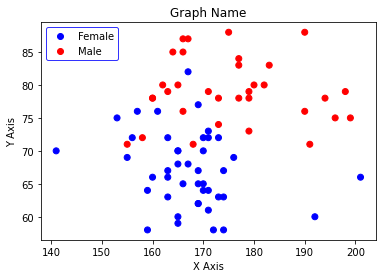

In [683]:
# legend_elements() is a method so we must name our scatter plat scatter...
scatter = plt.scatter(df.Height, df.initialWeight, c=df.gender, cmap="bwr")

# No arguments necessary, default is prop='colors'
handles, labels = scatter.legend_elements()

# Print out labels to see which appears first
print(labels)

# Re-name labels to Gender
labels = ['Female','Male']
leg = plt.legend(handles, labels, frameon=True)
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_edgecolor('b')
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Graph Name")
plt.show()
# Reference
# https://blog.finxter.com/matplotlib-scatter-plot/

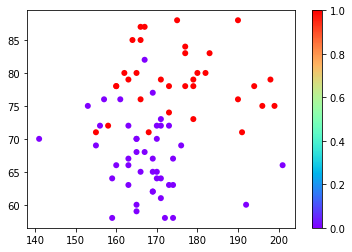

In [684]:
points = plt.scatter(df.Height, df.initialWeight, c=df.gender,cmap="rainbow", lw=0) #to assign male and female to the gender variables for 1 and 0
plt.colorbar(points)

From the above chart, it is inferred from the two clusters that one group has higher instances of height and initial weight. It is well known that males are on avaerage taller and weigh more than their female counterparts. It is assumed that this group is male and the labels will be changed accordingly

In [685]:
df['gender'] = df['gender'].replace([0,1], ['Female', 'Male']) #changing the names of the Diet variables 
df

,Person,gender,Age,Height,initialWeight,Diet,weight6weeks,weightloss
2,1,Female,22,159,58,Diet A,54.2,3.8
3,2,Female,46,192,60,Diet A,54.0,6.0
4,3,Female,55,170,64,Diet A,63.3,0.7
5,4,Female,33,171,64,Diet A,61.1,2.9
6,5,Female,50,170,65,Diet A,62.2,2.8
...,...,...,...,...,...,...,...,...
73,74,Male,35,183,83,Diet C,80.2,2.8
74,75,Male,49,177,84,Diet C,79.9,4.1
75,76,Male,28,164,85,Diet C,79.7,5.3
76,77,Male,40,167,87,Diet C,77.8,9.2


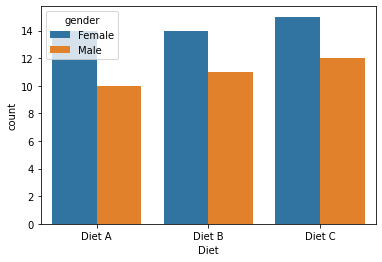

In [686]:
# count plot on single categorical variable
sns.countplot(x ='Diet', hue ='gender', data = df)
 
# Show the plot
plt.show()

In [687]:
df.Diet.describe()

count         76
unique         3
top       Diet C
freq          27
Name: Diet, dtype: object

## Hypothesis Testing

The following are the hypothesis drawn from the initial exploratory data analysis:
<br>

#### Hypothesis 1

<br>

**A Null Hypothesis(HO)** The means of all diets are equal with respect to weightloss

<br>

**An Alternative Hypothesis** The mean of at least one diet is different with respect to weightloss

<br>

#### Hypothesis 2

<br>

**A Null Hypothesis(HO)** The means of all genders are equal with respect to weightloss

<br>

**An Alternative Hypothesis** The mean of the genders are different with respect to weightloss

<br>

## Assumptions within the dataset
***
<br>
Limitations of Assumptions
https://www.statology.org/one-way-anova-r/

| Assumption | Explaination |
| :- | :- |
**Your dependent variable should be measured at the interval or ratio level** | Dependent variables must be of 'metric measurements'https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-the-factorial-anova/is and the values take on any given number within a range https://www.javatpoint.com/anova-test-in-python https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/assumptions-of-the-factorial-anova/ |
|**Your independent variable should consist of two or more categorical independent groups** | The categorical groups shouldn't overlap, being part of one group shouldn't affect the chance of being part of another group.|
|**You should have independence of observation** | There is no relationship between observations in each group or between the groups themselves. Each time there is a new datapoint in a group it is independent of all other datapoints in that group.|
|**There should be no significant outliers** | It can be difficult to define outlier in the context of the data set.|
|**Your dependent variable should be approximately normally distributed for each category of the independent**| When measured, the data points should take the form of a bell shaped curve.| https://www.statology.org/anova-assumptions/
|**There needs to be a homogeneity of variances**| This assumption can be tested using a Levene's test for homogeneity of variances.|https://www.statology.org/anova-assumptions/

### Assumption 1: Dependent Variable
***

The chosen dependent variable in this instance is the metric weighloss which is measured in kgs. 

In [688]:
#The dependent variable
dependent = df['weightloss']
dependent

2     3.8
3     6.0
4     0.7
5     2.9
6     2.8
     ... 
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weightloss, Length: 76, dtype: float64

### Assumption 2: Independent Variable
***

As we are going to look at two independent variables in this notebook, the author has chosen the following:
<br>
**Diet** - categories are: Diet A, Diet B and Diet C
<br>
**Gender** - catogories are: 0(which = Female) and 1 (which = Male)

In [689]:
#first independent variable
independent = df['Diet']
independent

2     Diet A
3     Diet A
4     Diet A
5     Diet A
6     Diet A
       ...  
73    Diet C
74    Diet C
75    Diet C
76    Diet C
77    Diet C
Name: Diet, Length: 76, dtype: object

### Assumption 3: Independence of Observation
***

This is a study design issues rather than something that you can test for. For this to be reached the "obersevations in each group are independent of each other and the observations within groups were obtained by a random sample". https://www.statology.org/anova-assumptions/. There is no standardised test to ensure independence of observation, nonetheless if this assumption is violated, the results obtained from the same could be wrong. Strong, robust and ethical data collection is required. https://www.statisticshowto.com/assumption-of-independence/

### Assumption 4: There should be no significant outliers
***

Outliers are unusual values in a dataset which can impact the analysis and distort the findings from research.https://statisticsbyjim.com/basics/remove-outliers/ The diet dataset has already been preprocessed to remove any null values. Some casues of outliers can include: data entry errors, sampling errors and natural variations.

<AxesSubplot:xlabel='weightloss', ylabel='Diet'>

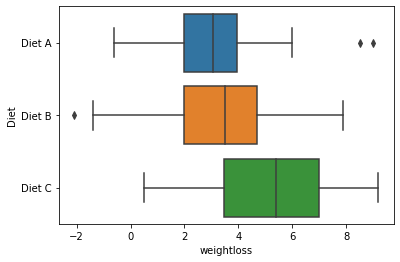

In [690]:
# https://seaborn.pydata.org/generated/seaborn.boxplot.html
sns.boxplot(x=dependent, y=independent)

### Assumption 5: Normal Distribution with the Dataset
***

Normal Distribution has two parameters: the mean of the distribution and the standard deviation. The data points are centred around the mean. The higher the standard deviation the flatter the curve will be. https://www.kaggle.com/gadaadhaarigeek/normal-distribution

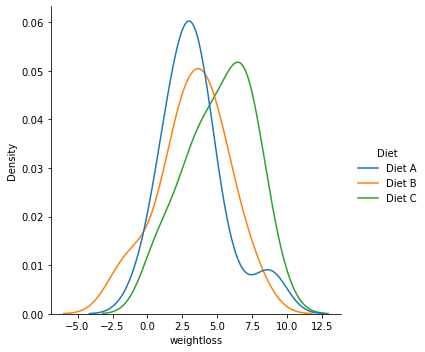

In [691]:
#To explore the normal distribution of each of the Diets in respect to the weightloss category
#KDE of the three categories
sns.displot(x=dependent, hue=independent, kind="kde")

As inferred in the previous assumption, there are outliers in the dataset and they have an negative impact on the data analysis. Above, you can see that Diet A slightly positively skewed distribution where as the other two variables are minimally negatively skewed in their distribution. However, they all appear to have a bell shaped curve. https://www.analyticsvidhya.com/blog/2020/04/statistics-data-science-normal-distribution/

df = df('Diet','weightloss')    
  
sm.qqplot(df, line ='45')
py.show()

Since the dataset is small and there are potential outliers, a Shapiro Wilks test will be performed on each of the dependent variables (Diet A, Diet B and Diet C). 
Next, each of the dependent variables will be extracted and a Shapiro Wilks Normality Test to see if the the data accepts or rejects the hypothesis of normality. https://variation.com/wp-content/distribution_analyzer_help/hs141.htm#:~:text=Shapiro%2DWilks%20Normality%20Test&text=The%20Shapiro%2DWilks%20test%20for,than%20or%20equal%20to%200.05. Shapiro was selected because the size of the sample of the dataset is relatively small (*n = 76*). https://statistics.laerd.com/spss-tutorials/testing-for-normality-using-spss-statistics.php

In [692]:
#extract the Diet A weight losses
weightloss_dietA = dependent[independent == 'Diet A']
weightloss_dietA

2     3.8
3     6.0
4     0.7
5     2.9
6     2.8
7     2.0
8     2.0
9     8.5
10    1.9
11    3.1
12    1.5
13    3.0
14    3.6
15    0.9
45   -0.6
46    1.1
47    4.5
48    4.1
49    9.0
50    2.4
51    3.9
52    3.5
53    5.1
54    3.5
Name: weightloss, dtype: float64

In [693]:
ss.shapiro(weightloss_dietA)

ShapiroResult(statistic=0.9255314469337463, pvalue=0.07748671621084213)

In [694]:
weightloss_dietB = dependent[independent == 'Diet B']
weightloss_dietB

16   -2.1
17    2.0
18    1.7
19    4.3
20    7.0
21    0.6
22    2.7
23    3.6
24    3.0
25    2.0
26    4.2
27    4.7
28    3.3
29   -0.5
55    4.2
56    2.4
57    5.8
58    3.5
59    5.3
60    1.7
61    5.4
62    6.1
63    7.9
64   -1.4
65    4.3
Name: weightloss, dtype: float64

In [695]:
ss.shapiro(weightloss_dietB)

ShapiroResult(statistic=0.9793620705604553, pvalue=0.8721737861633301)

In [696]:
#extract the Diet C weight losses
weightloss_dietC = dependent[independent == 'Diet C']
weightloss_dietC

30    7.0
31    5.6
32    3.4
33    6.8
34    7.8
35    5.4
36    6.8
37    7.2
38    7.0
39    7.3
40    0.9
41    7.6
42    4.1
43    6.3
44    5.0
66    2.5
67    0.9
68    3.5
69    0.5
70    2.8
71    8.6
72    4.5
73    2.8
74    4.1
75    5.3
76    9.2
77    6.1
Name: weightloss, dtype: float64

In [697]:
ss.shapiro(weightloss_dietC)

ShapiroResult(statistic=0.9601252675056458, pvalue=0.37203603982925415)

In each of the cases, the p > 0.05 which means that the test did not show evidence of non-normality. https://quantifyinghealth.com/report-shapiro-wilk-test/

To visualise the normal distribution, the qq plot function is used

import numpy as np
import statsmodels.api as sm
import pylab as py
 
data_points = weightloss_dietB

sm.qqplot(data_points, line ='45')
py.show()

import numpy as np
import statsmodels.api as sm
import pylab as py
  
np.random generates different random numbers
whenever the code is executed
Note: When you execute the same code 
the graph look different than shown below.
  
Random data points generated
#data_points = np.random.normal(0, 1, 100)    
data_points = weightloss_dietB

sm.qqplot(data_points, line)
py.show()

### Assumption 6: There needs to be a homogenity of variances
***

This assumption examines the distribution of spread of values around the means of continous variables. This aims to determine whether or not they are relatively similiar. https://methods.sagepub.com/reference/encyc-of-research-design/n179.xml. A p value of less than 0.05 idicates a violation of the assumption. "Listwise deletion, logarithmic transformation or non parametric methods" should be considered as a n alternative. https://www.scalestatistics.com/homogeneity-of-variance.html https://www.statisticssolutions.com/the-assumption-of-homogeneity-of-variance/ 
<br>
Barlett's test for homogeneity is also conducted. This focus on determing a *"test-statistic and finding the p value for the test-statistic, given the degrees of freedom and significance level"*https://stattrek.com/anova/homogeneity/bartletts-test.aspx

In [698]:
#conducting levene's test of homogenity
ss.levene(
    dependent[independent == 'Diet A'],
    dependent[independent == 'Diet B'],
    dependent[independent == 'Diet C'],
)

LeveneResult(statistic=0.46290764582507116, pvalue=0.6312856401117967)

The test shows a p value of higher than 0.05 indicating that there is no evidence of violation of this assumption.

In [703]:
# conducting Bartlett's test
from scipy.stats import bartlett # https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/

# subsetting the data:
DietA = df.query('Diet == "Diet A"')['weightloss']
DietB = df.query('Diet == "Diet B"')['weightloss']
DietC = df.query('Diet == "Diet C"')['weightloss']

# Bartlett's test in Python with SciPy:
stat, p = bartlett(DietA, DietB, DietC)

# Get the results:
print(stat, p)

#to get each individual group
df['Diet'].unique() #https://stattrek.com/anova/homogeneity/bartletts-test.aspx

0.21811133918795061 0.8966804982694925


array(['Diet A', 'Diet B', 'Diet C'], dtype=object)

The p value is greater thans the significance level, indicating that the null hypothesis should not be reject and the assumption is met.

## Performing the Anova

#### Fisher's One Way Anova

In [ ]:
# ANOVA.
ss.f_oneway(
    dependent[independent == 'Diet A'],
    dependent[independent == 'Diet B'],
    dependent[independent == 'Diet C']
)

The pvalue is under the recommended >0.05 indicating that there is a difference between the means of the groups. As the groups are not of same size, it is not possible to do individual t tests to explore the relationship between each of the Diet and the accompanying weight loss. 

## Conclusion

- Diet C has demonstrated a greater weightloss after 6 weeks than that other two Diets the mean of the weightloss was greater than that of the other two. 
- Ensuring the dataset meets the assumptions can be difficult especially when the dataset may contain outliers. In this notebook, numerous test were used to ensure the assumptions were met due to the nature of the outliers. 
- Data collection is extremely important and should always be considered when first designing your hypothesis. In this dataset,  as the participants for each Diet were different counts, different tests has to be conducted. 
- For example, as it was a small dataset, a paired t test could have been utilised to determine the difference in means between the three Diets

## References